In [1]:
!pip install matplotlib-scalebar

file logging/roshambo-log-20241016-1700.csv:
file logging/roshambo-log-20241016-1555.csv:
file logging/actions-log-2024-10-24-0208.csv:
file logging/actions-log-2024-10-22-1808.csv:
logging/actions-log-2024-10-24-0608.csv is empty, skipping
file logging/roshambo-log-20241014-1336.csv:
file logging/actions-log-2024-10-22-1002.csv:
file logging/actions-log-2024-10-21-1802.csv:
file logging/actions-log-2024-10-20-1821.csv:
file logging/actions-log-2024-10-23-2208.csv:
file logging/actions-log-2024-10-23-1408.csv:
file logging/actions-log-2024-10-23-0608.csv:
file logging/actions-log-2024-10-21-0621.csv:
file logging/actions-log-2024-10-22-0602.csv:
file logging/actions-log-2024-10-23-1008.csv:
file logging/actions-log-2024-10-20-2221.csv:
file logging/actions-log-2024-10-23-0208.csv:
file logging/actions-log-2024-10-23-1808.csv:
file logging/roshambo-log-20241011-1802.csv:
file logging/actions-log-2024-10-22-1408.csv:
file logging/actions-log-2024-10-21-1402.csv:
file logging/actions-log-

Text(0.1, 40.5, '2024-Oct-11 to 2024-Oct-24\n12.6d: 4,188 movements (332.0 moves/d)')

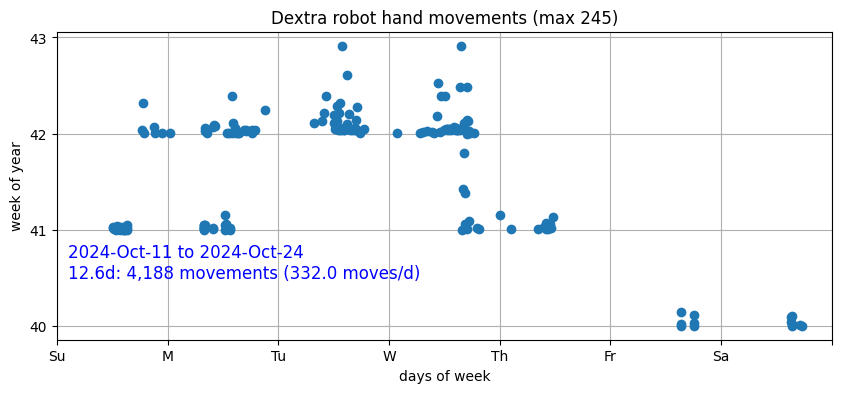

In [45]:
import os
from typing import Union
import matplotlib.pyplot as plt
import csv
from glob import glob
from numpy import genfromtxt
import numpy as np
import matplotlib.ticker as plticker
from matplotlib_scalebar.scalebar import ScaleBar
import datetime

dir='logging'
data=np.empty((0,6),dtype=int) # year,day_of_year,weekday,hour,minute,museum_movements_this_hour
elapsed_minutes=[] # populated with correct data depending on CSV format (old with only 6 columns or new with elapsed minutes column)
minutes=[]
for f in glob(os.path.join(dir,'*.csv')):
    if os.path.getsize(f)==0:
        print(f'{f} is empty, skipping')
        continue   
    print(f'file {f}:')
    rows = genfromtxt(f, delimiter=',', encoding="utf8", dtype=int, skip_header=1)
    # print(row)
    if len(rows.shape)==2 and rows.shape[0]>1: # has more than 1 row of data (first row is header that is int-parsed as vector of -1 values)
        if rows.shape[1]==6: # old format, does not have minutes_since_last
            data=np.append(data,rows[:,:],axis=0)
            elapsed_minutes.append(data)
        elif rows.shape[1]==7: # new format
            idx=[0,1,2,3,4,6]
            data=np.append(data,rows[:,idx],axis=0)
            
years=data[:,0]
days=data[:,1]
hours=data[:,3]
minutes=data[:,4]
year_frac_days=(days+hours/24.0+minutes/(24.*60)) # fraction of year in days
frac_days=year_frac_days%7 # fraction of week
int_weeks=np.floor(year_frac_days/7) # floored year weeks
start_week=np.min(int_weeks)
moves=data[:,5]
moves_nonzero=moves.astype(np.float32)
moves_nonzero[moves_nonzero==0]=np.nan
max_moves=np.max(moves)
norm_moves=(moves_nonzero/max_moves)+int_weeks # shift weeks vertically
datetimes=[]
for i in range(len(years)):
    datetimes.append(datetime.datetime(years[i], 1, 1) + datetime.timedelta(float(days[i]) - 1))
datetimes.sort()
# start/end date
date_start= datetimes[0]
date_end  = datetimes[-1]


fig=plt.figure(figsize=(10,4))
x=frac_days
y=norm_moves
plt.plot(x,y,'o')
plt.xlabel('days of week')
plt.ylabel('week of year')
plt.xlim([0,7])
plt.title(f'Dextra robot hand movements (max {max_moves})')
xticks=plt.gca().get_xticks()
weekdays=['Su','M','Tu','W','Th','Fr','Sa','']
# with_noons=[]
# for w in weekdays:
#     with_noons.append(w)
#     with_noons.append('12')
# plt.xticks(range(len(with_noons)),with_noons)
plt.xticks(range(len(weekdays)),weekdays)
loc = plticker.MultipleLocator(base=1.0)
plt.gca().yaxis.set_major_locator(loc)
plt.grid(True)
# for w in int_weeks:
#     plt.plot([0,8],[w,w],linewidth=0.05,color='k')

total_moves=np.sum(moves)
total_days=np.max(year_frac_days)-np.min(year_frac_days)
moves_per_day=total_moves/total_days
t=f'{date_start.strftime("%Y-%b-%d")} to {date_end.strftime("%Y-%b-%d")}\n{total_days:.1f}d: {total_moves:,} movements ({moves_per_day:.1f} moves/d)'
print(t)
plt.text(.1,np.min(int_weeks)+.5,t, color='b', fontsize=12)


# scalebar = ScaleBar(max_moves, "cm", length_fraction=0.25, rotation='vertical')
# plt.gca().add_artist(scalebar)